In [1]:
import sys
sys.path.append('..')

In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from core.dataset import *
from core.utils import *

In [3]:
load_dir = 'D:/Data/hoffmanlab/featureselection/data/'
ligands = ['CpG', 'FLA', 'FSL', 'LPS', 'P3K', 'PIC', 'R84', 'TNF']
sheet_type = 'am'

In [4]:
data = Data(load_dir, ligands, sheet_type, merge=True, numpy=False)

In [5]:
feature_importance = pd.read_csv('C:/Users/minha/Research/hoffmanlab/featuresel/data/untuned_model_feature_importance.csv')

### Loop through 1-20 features to find the threshold

In [6]:
# parameters
epochs = 15
feature_list = ['integrals_pos_38', 'min_trough2peak', 'integrals_pos_11', 'integrals_40', 'integrals_pos_14', 
                'time_series_2', 'integrals_pos_12', 'envelope_2', 'envelope_2', 'integrals_10', 'envelope_3', 'integrals_pos_37',
                'oscpower', 'integrals_pos_45', 'fold_change_21', 'fold_change_20']
dataset = data # already initialized
target_names = ligands
n = len(feature_list)

In [7]:
crs = []
for e in range(epochs):
    dat = feature_list[:(n-e)] # discard last entry of the feature list per epoch
    print(f'Number of features: {n - e}')
    cr = one_fit(dat, dataset, target_names, verbose=True, random_state=True, ret=True)
    crs.append(cr)

Number of features: 16
[23:01:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score      support
CpG            0.466063  0.415323  0.439232   248.000000
FLA            0.200000  0.195122  0.197531   123.000000
FSL            0.411458  0.456647  0.432877   173.000000
LPS            0.459716  0.557471  0.503896   174.000000
P3K            0.491803  0.384615  0.431655   156.000000
PIC            0.666667  0.681481  0.673993   135.000000
R84            0.770751  0.799180  0.784708   244.000000
TNF            0.530387  0.518919  0.524590   185.000000
accuracy       0.518776  0.518776  0.518776     0.518776
macro avg      0.499606  0.501095  0.498560  1438.000000
weighted avg   0.517568  0.518776  0.51

## Vector of 6 features meets the 50% threshold
* < 6 features metrics begin to rapidly decline

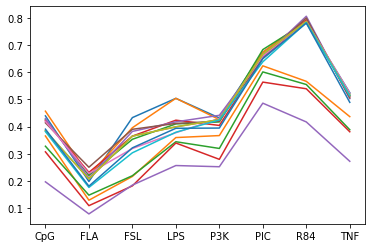

In [23]:
# f1-scores follow nearly identical trend across all ligands
# lines begin to diverge < on model classification reports trained on < 6 features
for i in crs:
    plt.plot(i.iloc[:8, 2])